In [49]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import pearsonr, spearmanr
from statsmodels.tsa.stattools import adfuller


In [50]:
cryptos = ['BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'SOL-USD', 'XRP-USD','DX-Y.NYB']
data = yf.download(cryptos, start='2020-05-01', end='2024-10-01')
price_df = data['Adj Close']
price_df

[*********************100%***********************]  7 of 7 completed


Ticker,BNB-USD,BTC-USD,DX-Y.NYB,ETH-USD,SOL-USD,USDT-USD,XRP-USD
Date,,,,,,,
2020-05-01 00:00:00+00:00,17.564993,8864.766602,98.800003,214.219101,0.728794,1.008137,0.219248
2020-05-02 00:00:00+00:00,17.584904,8988.596680,NaN,215.325378,0.715876,1.003478,0.223914
2020-05-03 00:00:00+00:00,17.126299,8897.468750,NaN,210.933151,0.679535,1.003508,0.219414
2020-05-04 00:00:00+00:00,17.100756,8912.654297,99.480003,208.174011,0.667491,1.006109,0.218963
2020-05-05 00:00:00+00:00,16.919775,9003.070312,99.709999,206.774399,0.641837,1.000856,0.216463
...,...,...,...,...,...,...,...
2024-09-26 00:00:00+00:00,596.776917,65181.019531,100.559998,2632.199951,155.576096,1.000243,0.590421
2024-09-27 00:00:00+00:00,607.867004,65790.664062,100.419998,2695.900635,157.749939,1.000179,0.588927
2024-09-28 00:00:00+00:00,601.567200,65887.648438,NaN,2677.539062,156.912430,1.000186,0.614801


In [48]:

for crypto in price_df:
    crypto_data = price_df[crypto].dropna() 
    result = adfuller(crypto_data)
    print(crypto)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])


BNB-USD
ADF Statistic: -1.8132800877038908
p-value: 0.37388871546139746
BTC-USD
ADF Statistic: -1.3880496669620506
p-value: 0.5879916602737236
DX-Y.NYB
ADF Statistic: -1.08135604829159
p-value: 0.7224493457134223
ETH-USD
ADF Statistic: -2.223370513139717
p-value: 0.19787290334637708
SOL-USD
ADF Statistic: -1.7716315100543059
p-value: 0.39463400765550055
USDT-USD
ADF Statistic: -5.871977812738411
p-value: 3.224290672428877e-07
XRP-USD
ADF Statistic: -3.2318901171531436
p-value: 0.01821138820306473


In [ ]:
# First-order differencing
crypto_diff = crypto_data.diff().dropna() 


Ticker     BTC-USD   ETH-USD  USDT-USD   BNB-USD   SOL-USD   XRP-USD  DX-Y.NYB
Ticker                                                                        
BTC-USD   1.000000  0.868306 -0.127458  0.841205  0.809115  0.605963 -0.059402
ETH-USD   0.868306  1.000000 -0.164377  0.910672  0.874987  0.738061  0.020015
USDT-USD -0.127458 -0.164377  1.000000 -0.199663 -0.125854 -0.046078 -0.234401
BNB-USD   0.841205  0.910672 -0.199663  1.000000  0.822895  0.640122  0.199989
SOL-USD   0.809115  0.874987 -0.125854  0.822895  1.000000  0.513397  0.091560
XRP-USD   0.605963  0.738061 -0.046078  0.640122  0.513397  1.000000 -0.328715
DX-Y.NYB -0.059402  0.020015 -0.234401  0.199989  0.091560 -0.328715  1.000000


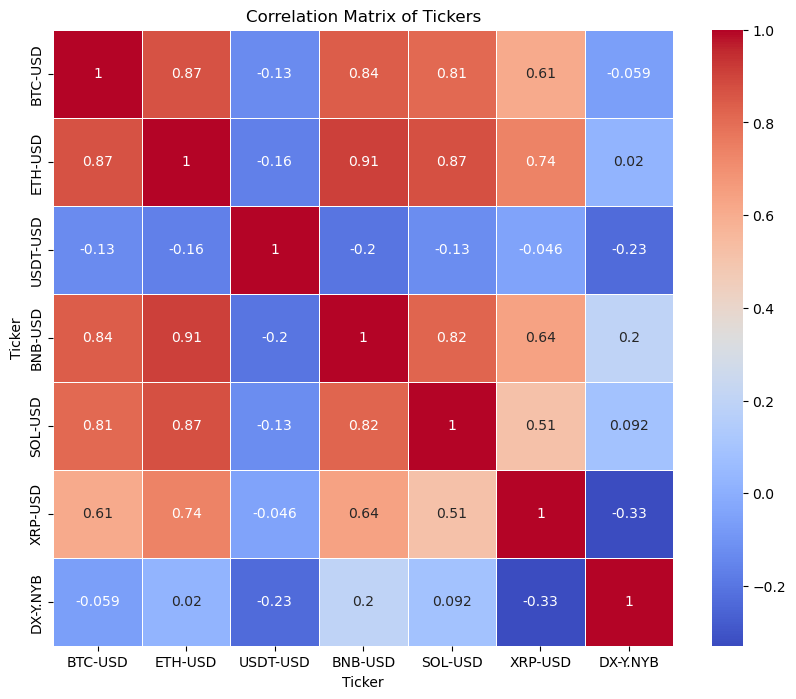

In [3]:
corr_matrix = price_df[cryptos].corr()
print(corr_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Tickers')
plt.show()

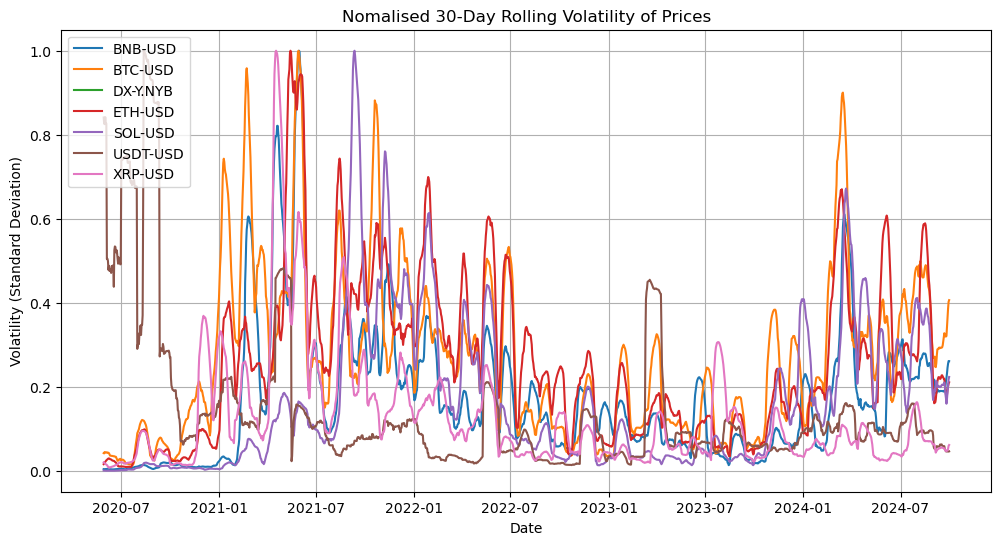

In [4]:
rolling_30d_volatility = price_df.rolling(window=30).std()
rolling_30d_volatility = rolling_30d_volatility /rolling_30d_volatility.max()
plt.figure(figsize=(12, 6))
for column in rolling_30d_volatility.columns:
    plt.plot(rolling_30d_volatility.index, rolling_30d_volatility[column], label=column)

# Add labels and title

plt.title('Nomalised 30-Day Rolling Volatility of Prices')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation)')
plt.legend(loc='upper left')  
plt.grid(True)   
plt.show()

Gausian Mixture Model - For regime seperation (WIP)

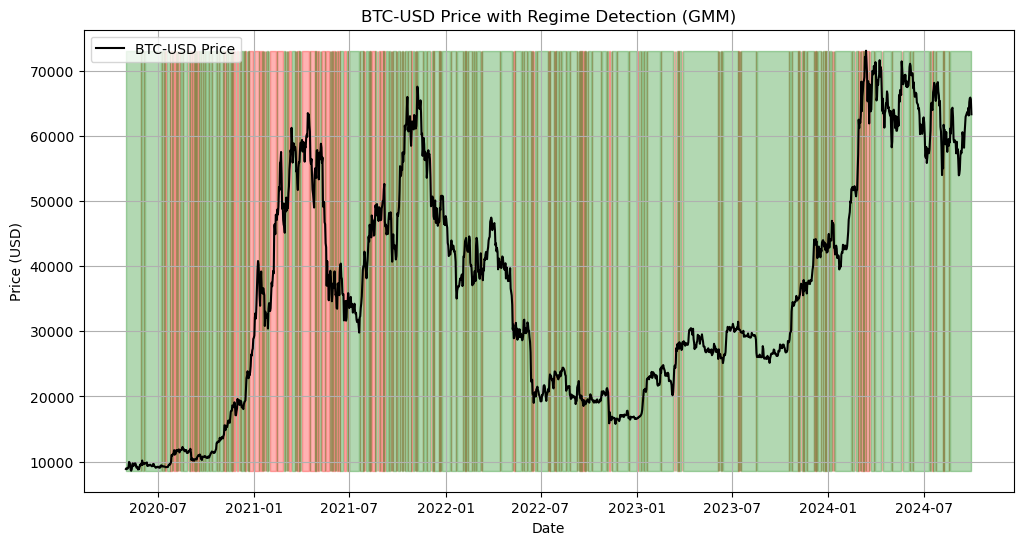

Ticker                      BNB-USD   BTC-USD  DX-Y.NYB   ETH-USD   SOL-USD  \
Date                                                                          
2020-05-02 00:00:00+00:00  0.001134  0.013969  0.000000  0.005164 -0.017725   
2020-05-03 00:00:00+00:00 -0.026079 -0.010138  0.000000 -0.020398 -0.050764   
2020-05-04 00:00:00+00:00 -0.001491  0.001707  0.006883 -0.013081 -0.017724   
2020-05-05 00:00:00+00:00 -0.010583  0.010145  0.002312 -0.006723 -0.038434   
2020-05-06 00:00:00+00:00 -0.015528  0.029511  0.003811 -0.013148 -0.029997   

Ticker                     USDT-USD   XRP-USD  Regime  
Date                                                   
2020-05-02 00:00:00+00:00 -0.004621  0.021282       1  
2020-05-03 00:00:00+00:00  0.000030 -0.020097       1  
2020-05-04 00:00:00+00:00  0.002592 -0.002055       1  
2020-05-05 00:00:00+00:00 -0.005221 -0.011417       1  
2020-05-06 00:00:00+00:00  0.017060 -0.005788       1  


In [5]:
 
# Step 2: Calculate daily returns  
returns_df = price_df.pct_change().dropna()

# Step 3: Fit Gaussian Mixture Model (GMM)
# Here, we assume 2 regimes, but you can experiment with different numbers of components
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)

# Fit the model using the returns data
gmm.fit(returns_df)
# Step 4: Predict the regime for each data point
regimes = gmm.predict(returns_df)
# Step 5: Add the regime to the returns DataFrame for visualization
returns_df['Regime'] = regimes

# Step 6: Plot the regimes over time
plt.figure(figsize=(12, 6))

# Plot BTC-USD price as an example
plt.plot(price_df.index, price_df['BTC-USD'], label='BTC-USD Price', color='black')

# Highlight the different regimes
regime_colors = {0: 'red', 1: 'green'}
for regime in np.unique(regimes):
    plt.fill_between(returns_df.index, price_df['BTC-USD'].min(), price_df['BTC-USD'].max(),
                     where=(returns_df['Regime'] == regime), color=regime_colors[regime], alpha=0.3)

plt.title('BTC-USD Price with Regime Detection (GMM)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Display the returns dataframe with the regimes assigned
print(returns_df.head())


Seasonality and Trend

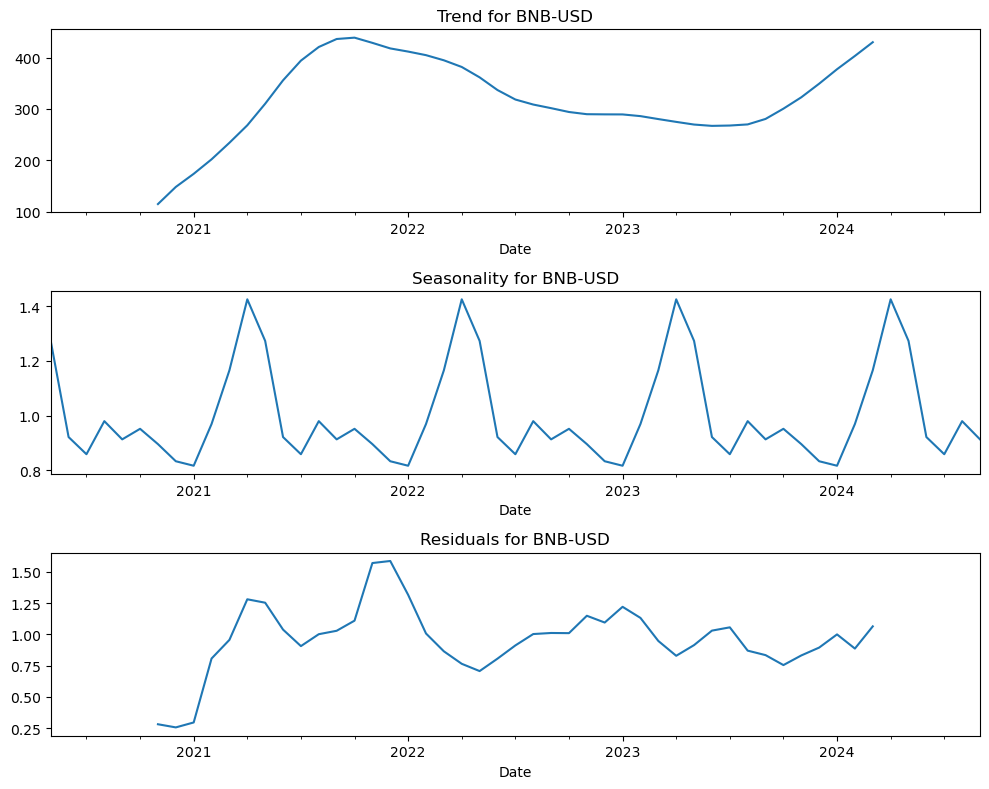

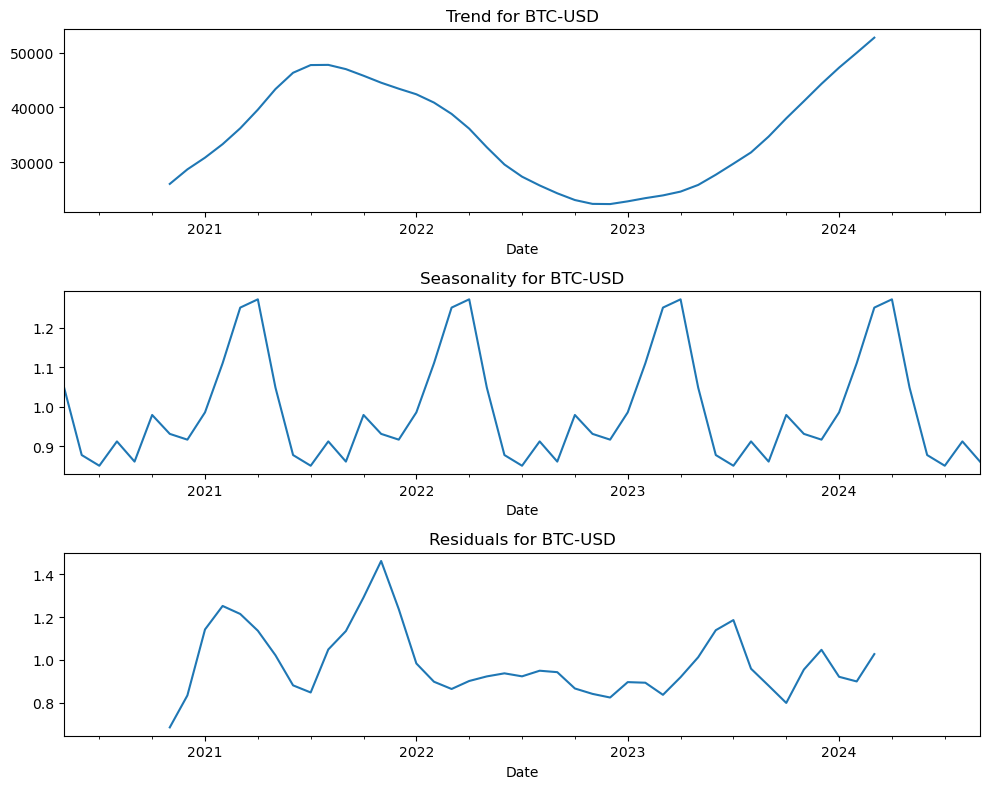

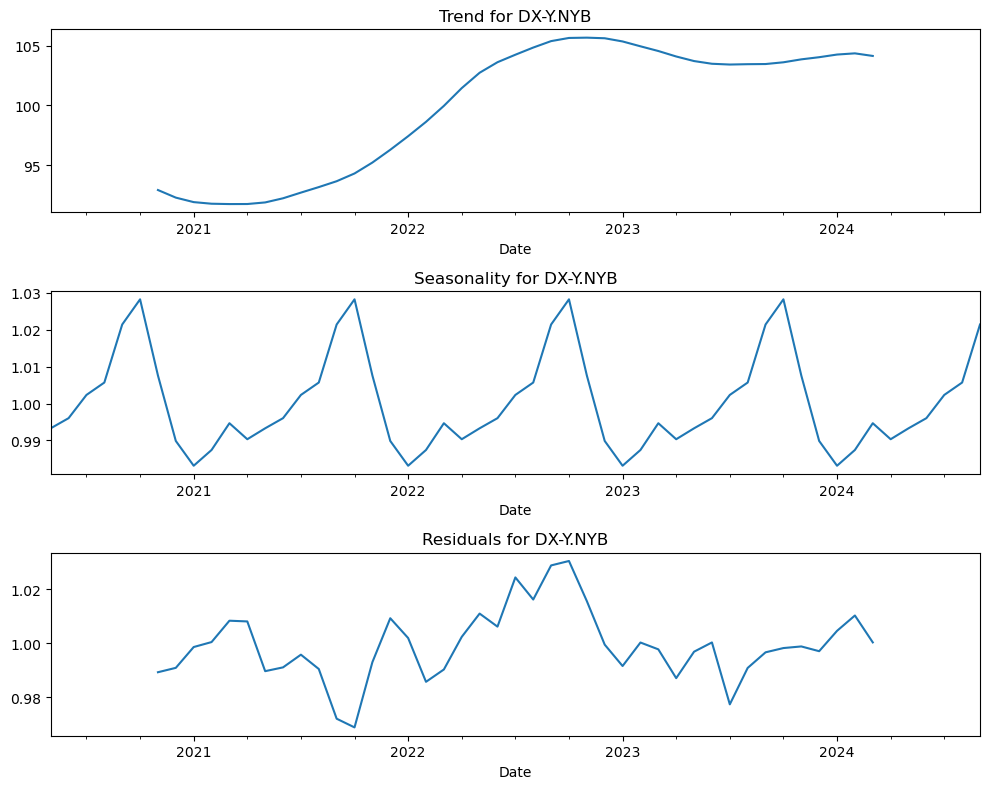

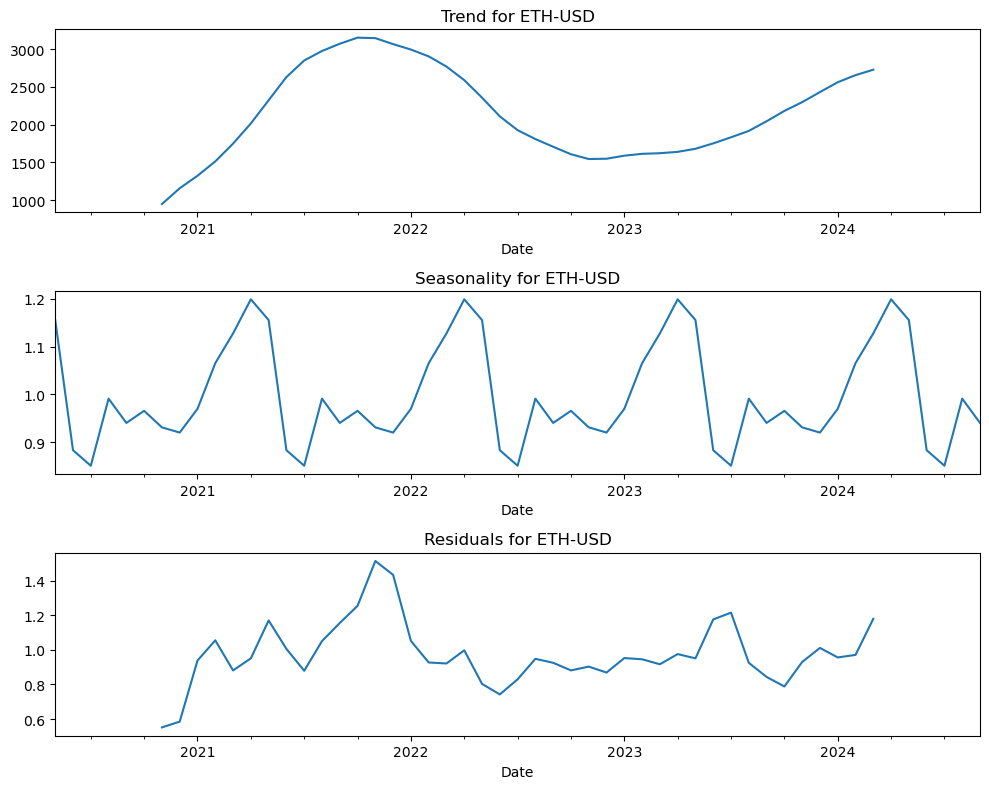

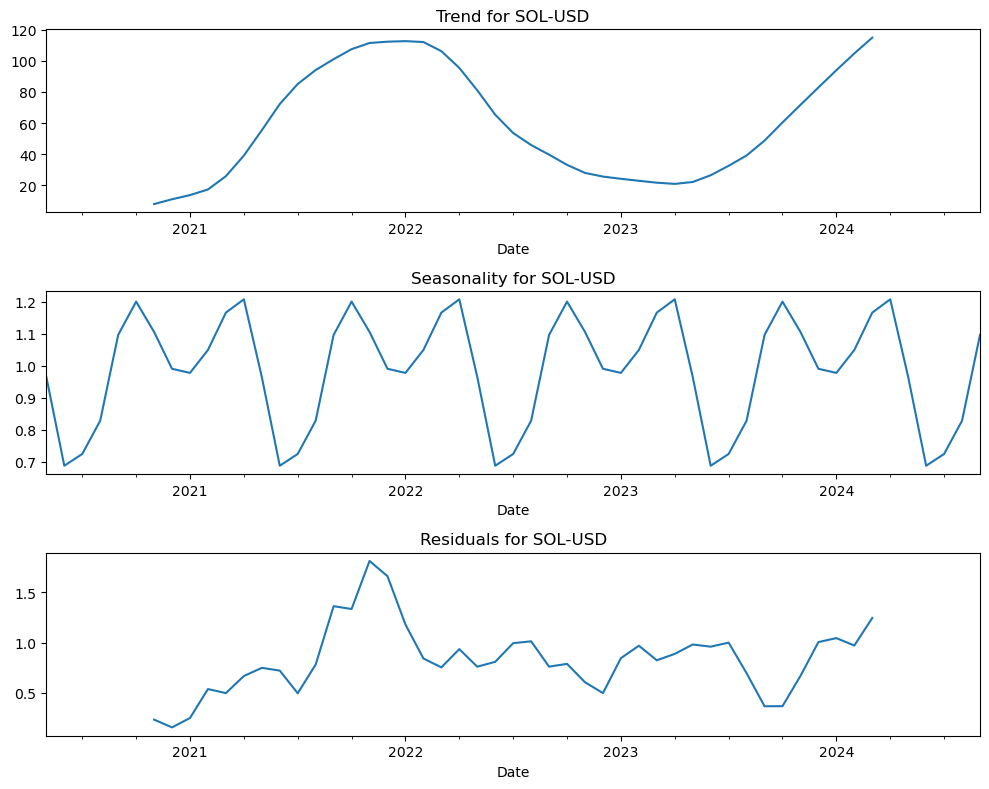

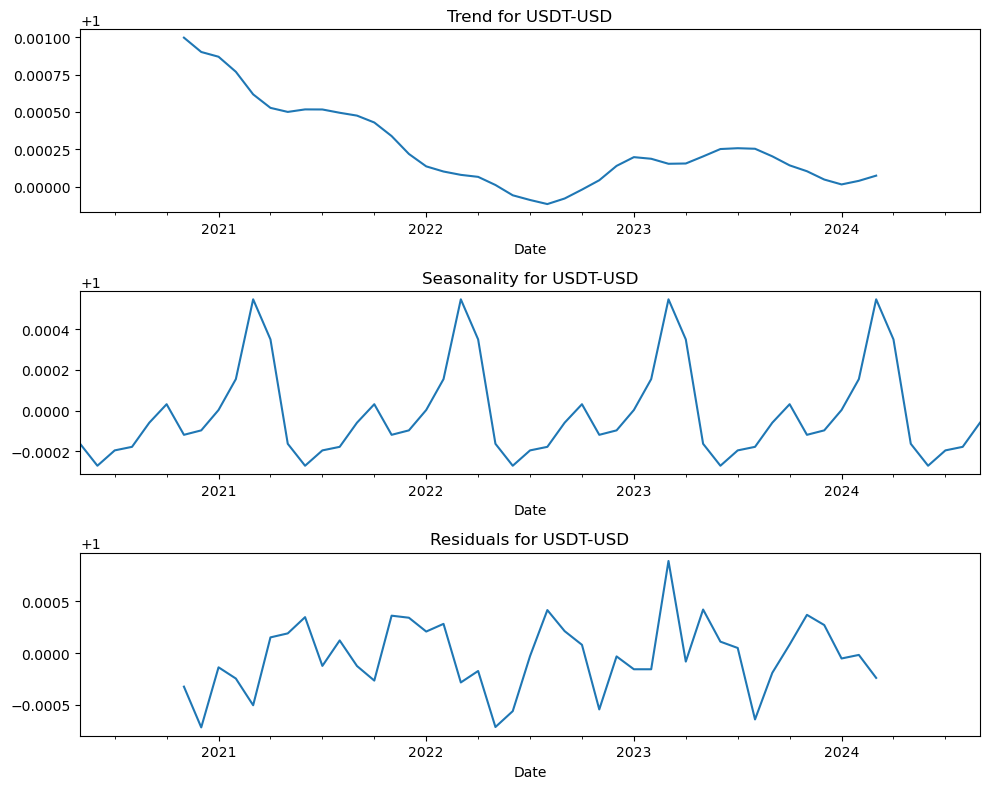

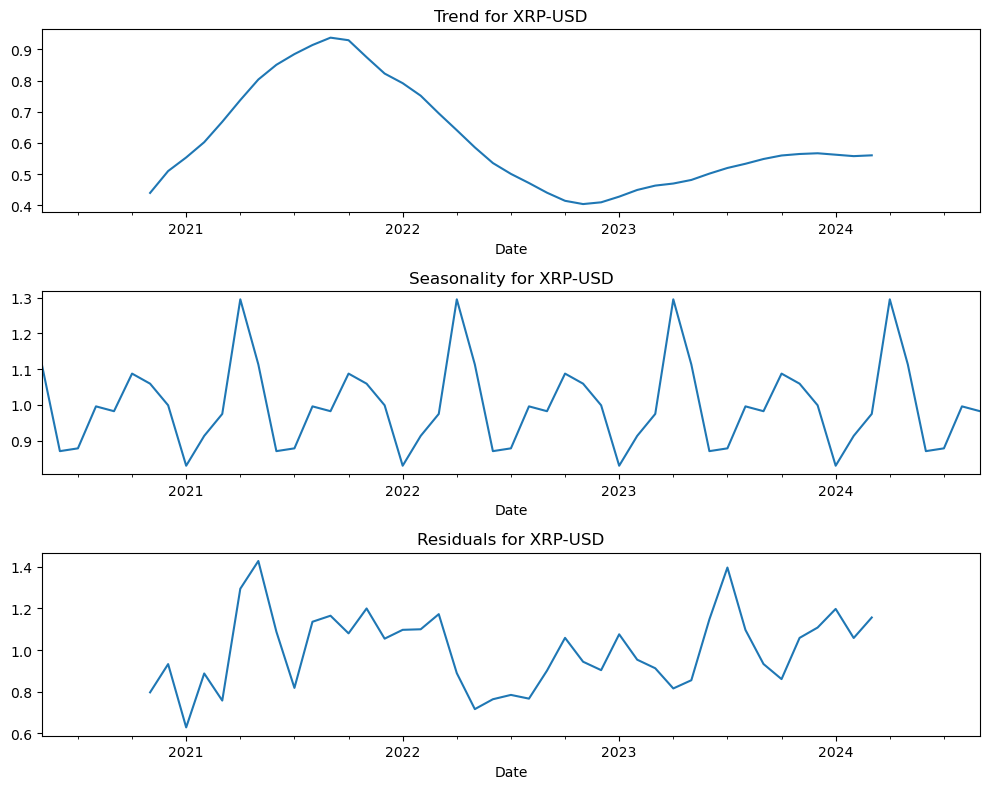

In [10]:
price_df_month = price_df.resample('M').mean()


for asset in price_df_month .columns:
    result = seasonal_decompose(price_df_month [asset].dropna(), model='multiplicative', period=12)
    
   
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))
    
    result.trend.plot(ax=ax1)
    ax1.set_title(f'Trend for {asset}')
    
    result.seasonal.plot(ax=ax2)
    ax2.set_title(f'Seasonality for {asset}')
    
    result.resid.plot(ax=ax3)
    ax3.set_title(f'Residuals for {asset}')
    
    plt.tight_layout()
    plt.show()

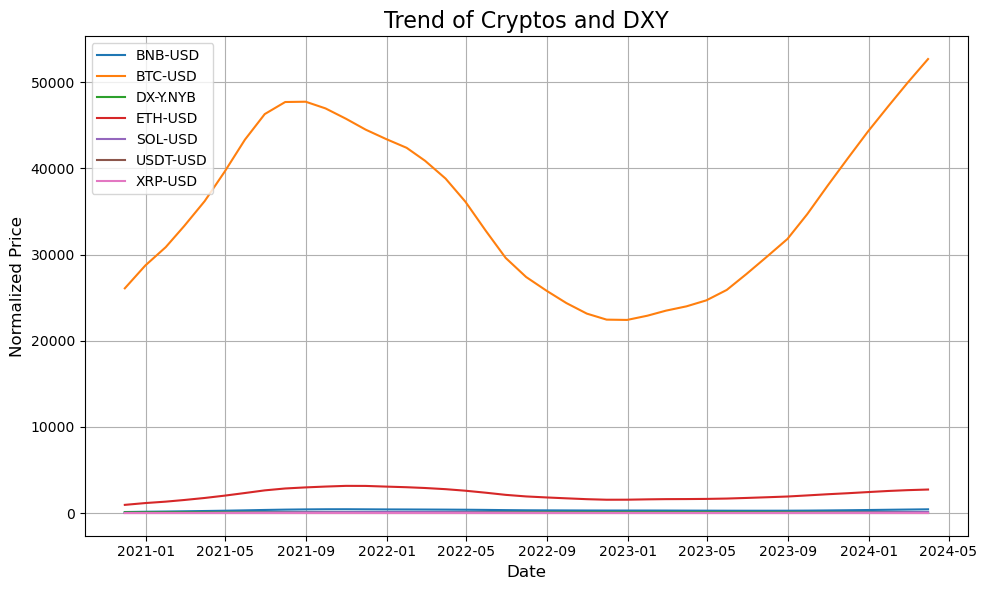

In [25]:
plt.figure(figsize=(10, 6))
for asset in price_df_month.columns:
    result = seasonal_decompose(price_df_month[asset].dropna(), model='multiplicative', period=12)
    trend = result.trend.dropna()
 
  
    plt.plot(trend, label=asset)

plt.title("Trend of Cryptos and DXY", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Normalized Price", fontsize=12)
plt.legend(loc="upper left", fontsize=10)
plt.grid(True)
plt.tight_layout()

plt.show()

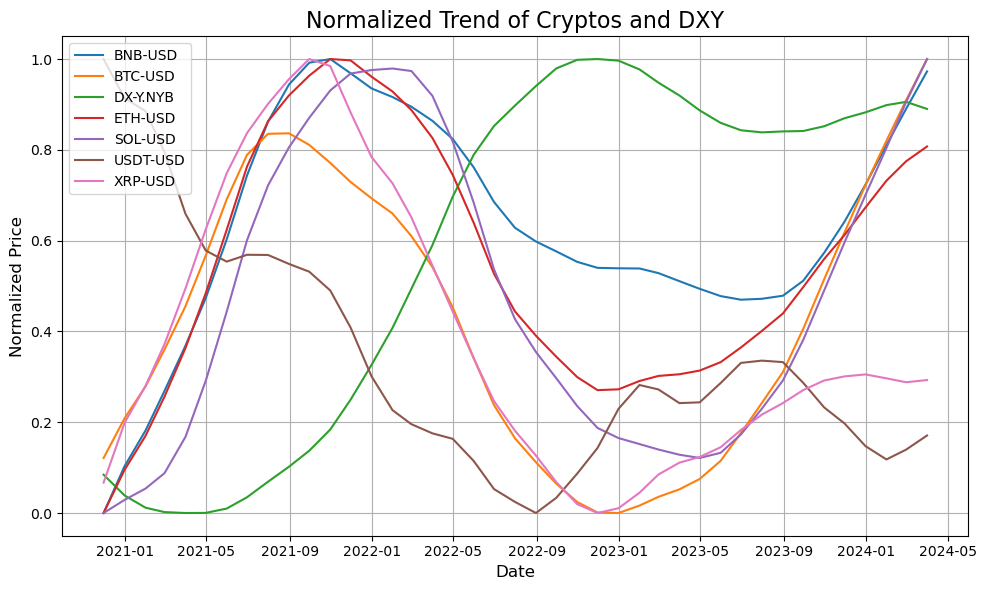

In [14]:
plt.figure(figsize=(10, 6))
for asset in price_df_month.columns:
    result = seasonal_decompose(price_df_month[asset].dropna(), model='multiplicative', period=12)
    trend = result.trend.dropna()
    
    # Normalize the trend to a range of 0 to 1
    normalized_trend = (trend - trend.min()) / (trend.max() - trend.min())
    
  
    plt.plot(normalized_trend, label=asset)

plt.title("Normalized Trend of Cryptos and DXY", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Normalized Price", fontsize=12)
plt.legend(loc="upper left", fontsize=10)
plt.grid(True)
plt.tight_layout()

plt.show()

In [22]:
price_df_month

Ticker,BNB-USD,BTC-USD,DX-Y.NYB,ETH-USD,SOL-USD,USDT-USD,XRP-USD
Date,,,,,,,
2020-05-31 00:00:00+00:00,16.612913,9263.151745,99.553000,208.125855,0.603380,1.002337,0.205220
2020-06-30 00:00:00+00:00,16.570955,9489.227214,97.087728,236.159229,0.658732,1.001084,0.192548
2020-07-31 00:00:00+00:00,17.812052,9589.899729,95.514091,259.405542,1.076531,1.000471,0.202799
2020-08-31 00:00:00+00:00,22.530665,11652.394185,93.044286,402.153482,3.054946,1.002578,0.290665
2020-09-30 00:00:00+00:00,25.499655,10660.276855,93.437143,368.373035,3.145125,1.001780,0.245358
2020-10-31 00:00:00+00:00,29.481324,11886.978201,93.406363,376.222389,2.138749,1.000873,0.247598
2020-11-30 00:00:00+00:00,28.793736,16645.757422,92.619501,486.144514,1.972100,1.000554,0.370845
2020-12-31 00:00:00+00:00,31.463888,21983.137097,90.512727,622.488431,1.637740,1.000086,0.474677
2021-01-31 00:00:00+00:00,41.749218,34761.649950,90.226316,1202.502802,3.260222,1.000735,0.288554


In [26]:
#Calculate the Pearson or Spearman correlation coefficients between the DXY and each cryptocurrency's trend. This will give us a sense of how strongly DXY and other assets are related.

trends = {}
pearson_corr = {}
spearman_corr = {}

# Decompose each asset's time series to extract trends
for asset in price_df.columns:
    result = seasonal_decompose(price_df[asset].dropna(), model='multiplicative', period=12)
    trends[asset] = result.trend.dropna().fillna(method='ffill').fillna(method='bfill')  # Forward and backward fill missing data

# Extract DXY trend and handle missing data
if 'DX-Y.NYB' in trends:
    dxy_trend = trends['DX-Y.NYB'].dropna().fillna(method='ffill').fillna(method='bfill')
else:
    raise KeyError("DXY (DX-Y.NYB) trend is missing")

# Calculate correlation coefficients between DXY and each cryptocurrency, excluding DXY itself
for asset in [crypto for crypto in cryptos if crypto != 'DX-Y.NYB']:
    crypto_trend = trends[asset].dropna().fillna(method='ffill').fillna(method='bfill')
    
    # Align the indexes before calculating correlations
    combined_df = pd.concat([dxy_trend, crypto_trend], axis=1).dropna()
    
    # Ensure the column names are correct
    if 'DX-Y.NYB' not in combined_df.columns or asset not in combined_df.columns:
        print(f"Missing data for {asset}. Skipping.")
        continue
    
    # Calculate Pearson correlation
    pearson_corr[asset] = pearsonr(combined_df['DX-Y.NYB'], combined_df[asset])[0]
    
    # Calculate Spearman correlation
    spearman_corr[asset] = spearmanr(combined_df['DX-Y.NYB'], combined_df[asset])[0]

# Display the results
print("Pearson Correlation Coefficients with DXY:")
for asset, corr in pearson_corr.items():
    print(f"{asset}: {corr:.4f}")

print("\nSpearman Correlation Coefficients with DXY:")
for asset, corr in spearman_corr.items():
    print(f"{asset}: {corr:.4f}")

Missing data for BTC-USD. Skipping.
Missing data for ETH-USD. Skipping.
Missing data for USDT-USD. Skipping.
Missing data for BNB-USD. Skipping.
Missing data for SOL-USD. Skipping.
Missing data for XRP-USD. Skipping.
Pearson Correlation Coefficients with DXY:

Spearman Correlation Coefficients with DXY:


In [37]:
price_df_filled= price_df.fillna(method='ffill')

In [33]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(price_df_filled['USDT-USD'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -5.871977812738411
p-value: 3.224290672428877e-07
